In [8]:
import os
import time
from obspy import read, Stream
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

In [3]:
#Data saving fonction

def write_data(network, station_code, location, channel, starttime, endtime):
    try:      
        # Start time
        start_time = time.time()
        
        st = client.get_waveforms(network, station_code, location, channel, starttime, endtime)
        # Save the waveform data to a file
        filename = f"{network}_{station_code}_{channel}_{starttime.date}_{endtime.date}.mseed"
        st.write(filename, format='MSEED')
        # Check if the file was created
        if os.path.exists(filename):
            print(f"Data saved to {filename}")
            
            # Plot a sample of the data
            st.plot()
        else:
            print(f"Failed to save data to {filename}")
                # End time
        end_time = time.time()
        
        # Calculate elapsed time
        elapsed_time = end_time - start_time
        print(f"Time taken to execute the function: {elapsed_time:.2f} seconds")
        
    except Exception as e:
        print(f"Error fetching data for {network} {station_code}: {e}")
    return

In [11]:
#Setting parameters
starttime = UTCDateTime(2023, 1, 1)
endtime = UTCDateTime(2023, 2, 1)
network = "MX"
station_code = "MOIG"
channel = 'BHZ'
location = ""

# Initialize the client
client = Client("IRIS")

Data saved to MX_MOIG_BHZ_2023-01-01_2023-02-01.mseed


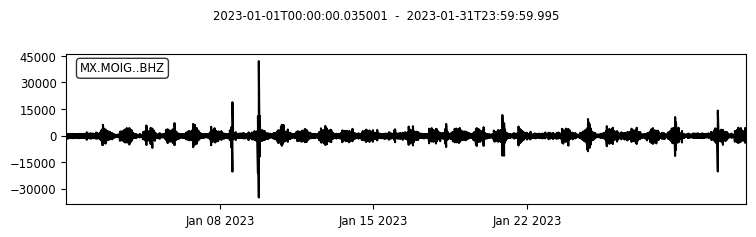

Time taken to execute the function: 65.92 seconds
Data saved to MX_MOIG_BHZ_2023-02-01_2023-03-01.mseed


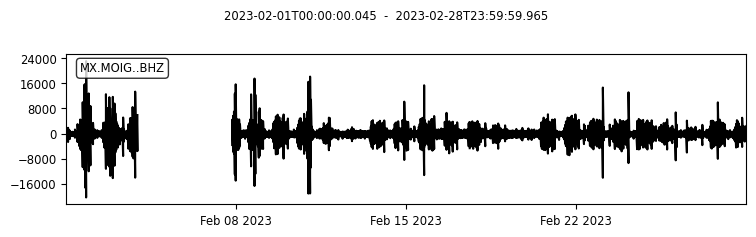

Time taken to execute the function: 333.22 seconds
Data saved to MX_MOIG_BHZ_2023-03-01_2023-04-01.mseed


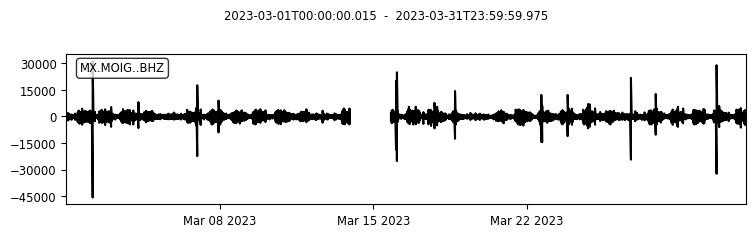

Time taken to execute the function: 408.25 seconds
Data saved to MX_MOIG_BHZ_2023-04-01_2023-05-01.mseed


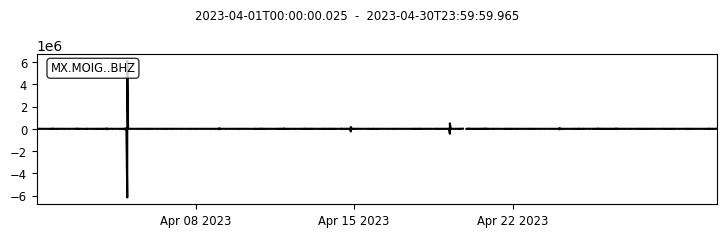

Time taken to execute the function: 394.89 seconds
Data saved to MX_MOIG_BHZ_2023-05-01_2023-06-01.mseed


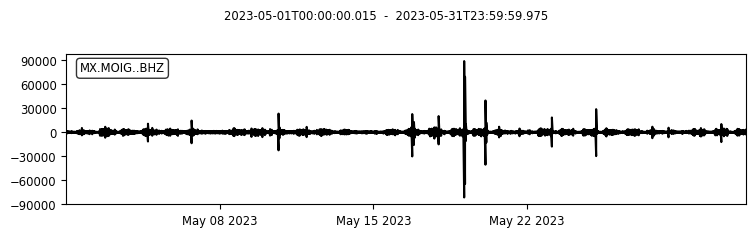

Time taken to execute the function: 52.44 seconds
Data saved to MX_MOIG_BHZ_2023-06-01_2023-07-01.mseed


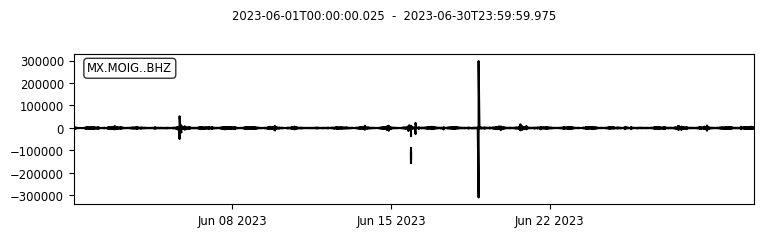

Time taken to execute the function: 433.47 seconds
Data saved to MX_MOIG_BHZ_2023-07-01_2023-08-01.mseed


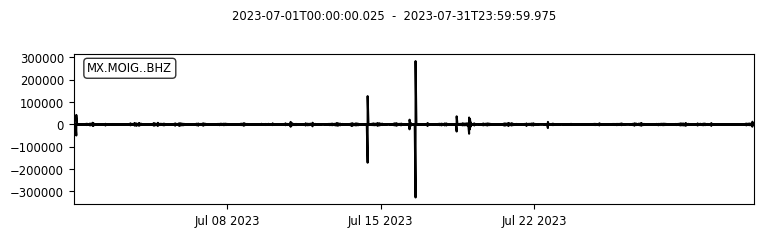

Time taken to execute the function: 441.35 seconds
Data saved to MX_MOIG_BHZ_2023-08-01_2023-09-01.mseed


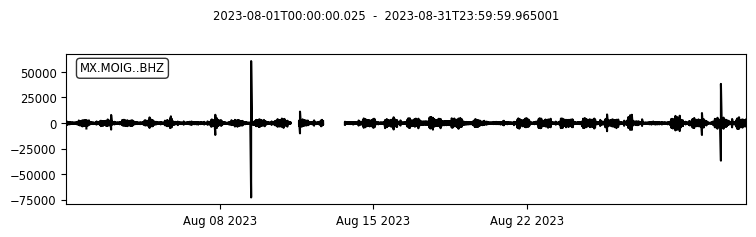

Time taken to execute the function: 415.97 seconds
Data saved to MX_MOIG_BHZ_2023-09-01_2023-10-01.mseed


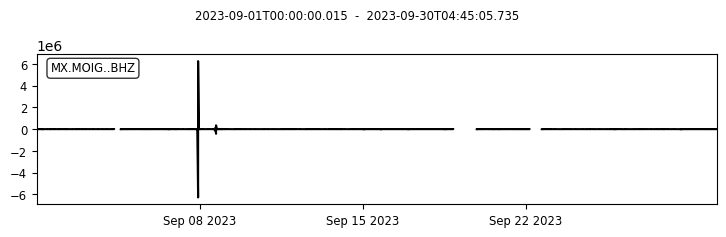

Time taken to execute the function: 40.60 seconds
Data saved to MX_MOIG_BHZ_2023-10-01_2023-11-01.mseed


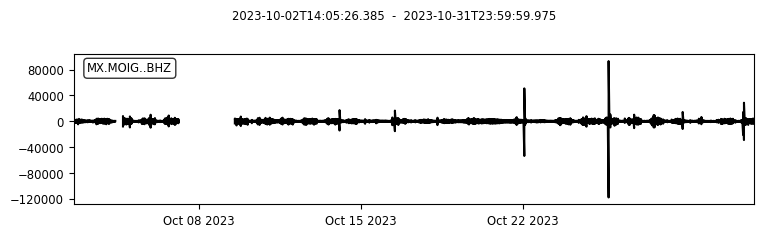

Time taken to execute the function: 39.26 seconds
Data saved to MX_MOIG_BHZ_2023-11-01_2023-12-01.mseed


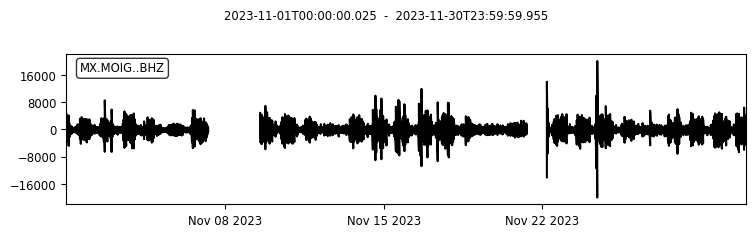

Time taken to execute the function: 38.80 seconds


ValueError: month must be in 1..12

In [12]:
# Loop through each month of 2023
for month in range(1, 13):
    # Set start and end times for the current month
    starttime = UTCDateTime(2023, month, 1)
    endtime = UTCDateTime(2023, month + 1, 1)

    # Write data for the current month
    write_data(network, station_code, location, channel, starttime, endtime)

Data saved to MX_MOIG_BHZ_2023-12-01_2024-01-01.mseed


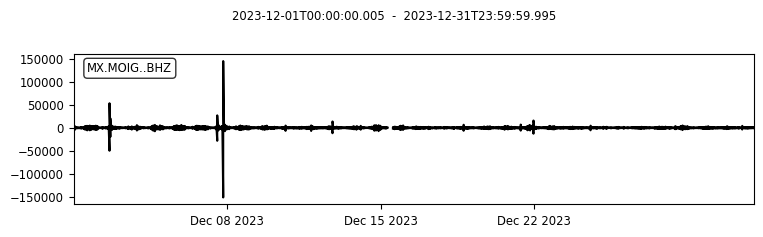

Time taken to execute the function: 403.84 seconds


In [13]:
starttime = UTCDateTime(2023, 12, 1)
endtime = UTCDateTime(2024, 1, 1)

# Write data for the current month
write_data(network, station_code, location, channel, starttime, endtime)

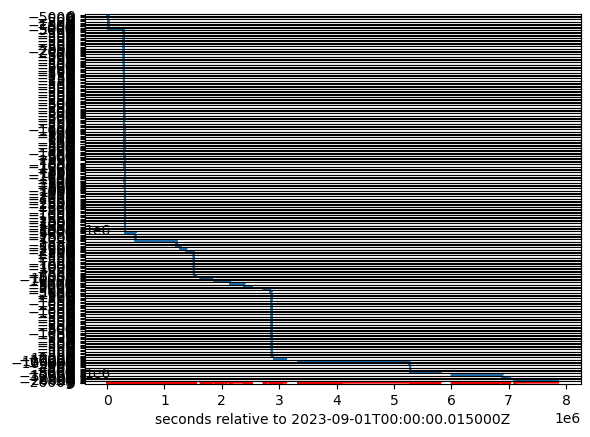

In [17]:
#highest event is in month 9 so I want to include that in my base model

#merging 3 months for training data
# Read in all files starting with dis.
st = read("MX_MOIG_BHZ_2023-09-01_2023-10-01.mseed")
st += read("MX_MOIG_BHZ_2023-10-01_2023-11-01.mseed")
st += read("MX_MOIG_BHZ_2023-11-01_2023-12-01.mseed")

# sort
st.sort(['starttime'])

In [ ]:
st.plot()